In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.preprocessing import label_binarize

import utils

In [2]:
df = pd.read_csv("dataset/clean_df.csv")

In [3]:
df.columns

Index(['FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS', 'IN_PKTS',
       'L4_DST_PORT', 'L4_SRC_PORT', 'LAST_SWITCHED', 'OUT_BYTES', 'OUT_PKTS',
       'SRC_TO_DST_SECOND_BYTES', 'TCP_FLAGS', 'TCP_WIN_MAX_OUT',
       'TCP_WIN_MSS_IN', 'LABEL', 'PROTOCOL_MAP_ICMP', 'PROTOCOL_MAP_TCP',
       'PROTOCOL_MAP_UDP', 'L7_PROTO_NAME_BITTORRENT', 'L7_PROTO_NAME_DNS',
       'L7_PROTO_NAME_GOOGLE', 'L7_PROTO_NAME_HTTP', 'L7_PROTO_NAME_ICMP',
       'L7_PROTO_NAME_NFS', 'L7_PROTO_NAME_NTP', 'L7_PROTO_NAME_QUIC',
       'L7_PROTO_NAME_SSH', 'L7_PROTO_NAME_STUN', 'L7_PROTO_NAME_TEAMVIEWER',
       'L7_PROTO_NAME_TLS', 'L7_PROTO_NAME_UNKNOWN'],
      dtype='object')

In [4]:
df.shape

(400000, 29)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FIRST_SWITCHED,400000.0,1.617776e+09,710514.577823,1.616660e+09,1.616673e+09,1.618227e+09,1.618238e+09,1.618262e+09
FLOW_DURATION_MILLISECONDS,400000.0,3.549474e+04,43140.350029,0.000000e+00,0.000000e+00,4.710000e+02,6.028600e+04,1.199980e+05
IN_PKTS,400000.0,1.354171e+00,1.221682,0.000000e+00,0.000000e+00,1.386294e+00,2.397895e+00,1.219310e+01
L4_DST_PORT,400000.0,1.099432e+04,19033.252192,0.000000e+00,8.000000e+01,8.000000e+01,1.384025e+04,6.553500e+04
L4_SRC_PORT,400000.0,4.286045e+04,15623.473724,0.000000e+00,3.737400e+04,4.921400e+04,5.128600e+04,6.553500e+04
LAST_SWITCHED,400000.0,1.617776e+09,710537.005787,1.616660e+09,1.616673e+09,1.618227e+09,1.618238e+09,1.618262e+09
OUT_BYTES,400000.0,4.812031e+00,2.274144,0.000000e+00,3.688879e+00,5.438079e+00,6.269096e+00,1.852065e+01
OUT_PKTS,400000.0,1.249600e+00,1.203982,0.000000e+00,0.000000e+00,1.098612e+00,2.302585e+00,1.177256e+01
SRC_TO_DST_SECOND_BYTES,400000.0,5.624949e+00,1.521231,3.332205e+00,3.784190e+00,5.560682e+00,6.971669e+00,1.911135e+01
TCP_FLAGS,400000.0,1.958479e+01,10.160464,0.000000e+00,1.900000e+01,2.400000e+01,2.700000e+01,2.230000e+02


In [6]:
def scale_x(data):
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(data)
    

In [7]:
def store_df(name, X, y):
    compression_opts = dict(method='zip',
                            archive_name=name+'_X.csv')  
    X.to_csv(name+'_X.zip', index=True,
              compression=compression_opts)  
    compression_opts = dict(method='zip',
                            archive_name=name+'_y.csv')  
    y.to_csv(name+'_y.zip', index=True,
              compression=compression_opts)  

In [8]:
random_forest_df = df.copy()

# Train, Test, Validation Split

In [9]:
y = df["LABEL"]
X = df.drop(["LABEL"], axis = 1)

y.shape, X.shape

((400000,), (400000, 28))

In [12]:
from sklearn.model_selection import train_test_split

val_rate = 15/45

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_rate, random_state=42)

In [13]:
print(len(X_train) / len(X))
print(len(X_val) / len(X))
print(len(X_test) / len(X))

0.55
0.15
0.3


# Random Forest Model

In [14]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [15]:
# Entrenamos el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### Validación

In [16]:
# Realizamos predicciones con las metricas de validación
val_preds = rf.predict(X_val)
val_preds.shape

(60000,)

In [17]:
# Get the results
utils.evaluate_model(y_val, val_preds)

Matrix de confusión: 
 [[14881     1     1     2]
 [    5 14995     0     0]
 [    0     0 15020     0]
 [    0     0     0 15095]]
                                precision    recall  f1-score   support

                   Normal flow       1.00      1.00      1.00     14885
         SYN Scan - aggressive       1.00      1.00      1.00     15000
Denial of Service R-U-Dead-Yet       1.00      1.00      1.00     15020
   Denial of Service Slowloris       1.00      1.00      1.00     15095

                      accuracy                           1.00     60000
                     macro avg       1.00      1.00      1.00     60000
                  weighted avg       1.00      1.00      1.00     60000

recall_score:  [0.99973127 0.99966667 1.         1.        ]
precision_score:  [0.99966411 0.99993332 0.99993343 0.99986752]
f1_score:  [0.99969769 0.99979997 0.99996671 0.99993376]
accuracy:  0.99985


### Prueba

In [18]:
# Realizamos predicciones con las metricas de validación
test_preds = rf.predict(X_test)

In [19]:
# Get the results
utils.evaluate_model(y_test, test_preds)

Matrix de confusión: 
 [[29977     0     0     8]
 [    7 30087     0     0]
 [    0     0 29968     0]
 [    1     0     0 29952]]
                                precision    recall  f1-score   support

                   Normal flow       1.00      1.00      1.00     29985
         SYN Scan - aggressive       1.00      1.00      1.00     30094
Denial of Service R-U-Dead-Yet       1.00      1.00      1.00     29968
   Denial of Service Slowloris       1.00      1.00      1.00     29953

                      accuracy                           1.00    120000
                     macro avg       1.00      1.00      1.00    120000
                  weighted avg       1.00      1.00      1.00    120000

recall_score:  [0.9997332  0.9997674  1.         0.99996661]
precision_score:  [0.9997332  1.         1.         0.99973298]
f1_score:  [0.9997332  0.99988368 1.         0.99984978]
accuracy:  0.9998666666666667


### Gráfica de la curva ROC

In [21]:
utils.plot_roc_curve(rf, X_train, y_train, X_test, y_test)

## K-Fold cross validation

In [22]:
# New division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [24]:
scores = cross_val_score(rf, X_train, y_train, cv=10)
scores

array([0.99975   , 1.        , 0.99992857, 0.99996429, 0.99985714,
       0.99992857, 0.99989286, 0.99982143, 0.99989286, 0.99982143])

# Support Vector Machine

In [25]:
from sklearn.svm import LinearSVC

In [26]:
svc = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000))

In [ ]:
# Train the model
svc.fit(X_train, y_train)

## Validation

In [ ]:
val_preds = svc.predict(X_val)

In [ ]:
utils.evaluate_model(y_val, val_preds)

## Test

In [ ]:
test_preds = svc.predict(X_test)

In [ ]:
utils.evaluate_model(y_test, test_preds)

## Gráfica de la curva ROC

/Users/douglasdeleon/Documents/DouglasJr/UVG/semestre9/SecurityDS/proyecto-1/attack-detection/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


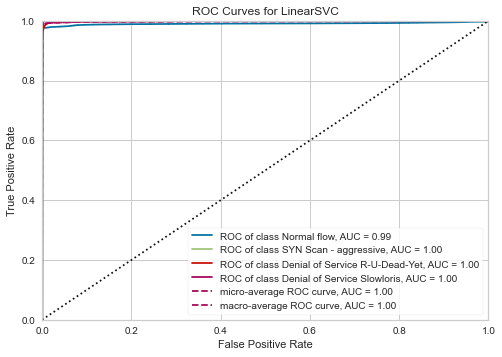

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LinearSVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Normal flow', 1: 'SYN Scan - aggressive',
                2: 'Denial of Service R-U-Dead-Yet',
                3: 'Denial of Service Slowloris'},
       estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('linearsvc', LinearSVC(max_iter=2000))]))

In [28]:
utils.plot_roc_curve(svc, X_train, y_train, X_test, y_test)

# K Fold cross validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

In [ ]:
svc = make_pipeline(StandardScaler(), LinearSVC(max_iter=2000))

In [ ]:
scores = cross_val_score(rf, X_train, y_train, cv=10)
scores